# Plot of results: CPU vs GPU baseline level 0

In [1]:
import re, sys, os
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
def pygrep(match, filelist, processline=lambda x: x):
    output=[]
    for f in filter(os.path.isfile, filelist):
        for line in open(f).readlines():
            if re.match(match, line):
                output.append(processline(line))
    return output

def line2data(line):
    newline = line.replace('WallClockTime: ', '').replace('Pre:','').replace('Solve: ','').replace('Post: ','').replace('Total: ','')
    return [float(x) for x in newline.split()]

def averageoutfile(file, match='WallClockTime'):
    logfile=pygrep(match, [file], processline=line2data)
    return list(np.mean(np.array(logfile),axis=0)), len(logfile)

def getRanksTimes(caselist, col=2):
    ranks = [x['NRANKS'] for x in caselist]
    times = [x['avgstats'][col] for x in caselist]
    return np.array(ranks), np.array(times)

def loadData(caselist, jsonfile, loadjson):
    if loadjson:
        # Reading from json file    
        with open(jsonfile, 'r') as openfile:
            caselist = json.load(openfile)
    else:
        # Load the original data 
        for case in caselist:
            print('Loading '+case['file'])
            case['avgstats'], case['iters']=averageoutfile(case['file'])
        with open(jsonfile, 'w') as outfile:
            outfile.write(json.dumps(caselist, indent=4))     
    return caselist

In [3]:
GPUcaselist=[
    {'NRANKS':1*8,   'NNODES':1,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0001/Nodes_0001-1523318.out'},    
    {'NRANKS':2*8,   'NNODES':2,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0002/Nodes_0002-1523319.out'},    
    {'NRANKS':4*8,   'NNODES':4,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0004/Nodes_0004-1515363.out'},
    {'NRANKS':8*8,   'NNODES':8,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0008/Nodes_0008-1515369.out'},
    {'NRANKS':16*8,  'NNODES':16,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0016/Nodes_0016-1515370.out'},
    {'NRANKS':32*8,  'NNODES':32,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0032/Nodes_0032-1515371.out'},
    {'NRANKS':64*8,  'NNODES':64,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0064/Nodes_0064-1515372.out'},
    {'NRANKS':128*8, 'NNODES':128, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0128/Nodes_0128-1515373.out'},
    {'NRANKS':256*8, 'NNODES':256, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0256/Nodes_0256-1515374.out'},
    {'NRANKS':512*8, 'NNODES':512, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0512/Nodes_0512-1515375.out'},    
]
jsonfile='GPU_Baseline_level0.json'
loadjson = True
GPUcaselist = loadData(GPUcaselist, jsonfile, loadjson)

print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in GPUcaselist:
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
         8     0.0011     2.5071     0.3438     2.8520
        16     0.0006     1.3268     0.2592     1.5867
        32     0.0004     0.7377     0.2057     0.9437
        64     0.0002     0.4462     0.1849     0.6313
       128     0.0002     0.3155     0.1823     0.4980
       256     0.0002     0.2372     0.1886     0.4259
       512     0.0002     0.1983     0.2001     0.3986
      1024     0.0002     0.1824     0.2112     0.3938
      2048     0.0002     0.1733     0.2276     0.4011
      4096     0.0002     0.1671     0.2394     0.4067


In [4]:
CPUcaselist=[ 
    {'NRANKS':1*8, 'NNODES':1,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0001/Nodes.out'}, #_0001-15126682.out'},
    {'NRANKS':2*8, 'NNODES':2,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0002/Nodes.out'}, #_0002-15126684.out'},
    {'NRANKS':4*8, 'NNODES':4,     'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0004/Nodes_0004-1515118.out'},
    {'NRANKS':8*8, 'NNODES':8,     'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0008/Nodes_0008-1515119.out'},
    {'NRANKS':16*8,'NNODES':16,    'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0016/Nodes_0016-1515120.out'},
    {'NRANKS':32*8, 'NNODES':32,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0032/Nodes_0032-1515121.out'},
    {'NRANKS':64*8, 'NNODES':64,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0064/Nodes_0064-1508687.out'},
    {'NRANKS':128*8, 'NNODES':128, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0128/Nodes_0128-1508688.out'},
    {'NRANKS':256*8, 'NNODES':256, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0256/Nodes_0256-1508689.out'},
    {'NRANKS':512*8, 'NNODES':512, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0512/Nodes_0512-1508690.out'},
]

jsonfile = 'CPU_Baseline_level0.json'
loadjson = True
CPUcaselist = loadData(CPUcaselist, jsonfile, loadjson)

print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in CPUcaselist:
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
         8     0.4827    69.2018     4.7047    74.3891
        16     0.2315    34.4323     2.4112    37.0748
        32     0.1111    17.1593     1.5011    18.7708
        64     0.0539     8.5555     0.7626     9.3721
       128     0.0267     4.3321     0.4512     4.8099
       256     0.0133     2.2111     0.2856     2.5099
       512     0.0067     1.0805     0.1998     1.2870
      1024     0.0035     0.5990     0.1785     0.7809
      2048     0.0020     0.3212     0.1629     0.4861
      4096     0.0010     0.1802     0.1612     0.3424


In [5]:
datadir='/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/BLCKMAXGRID_GPU_Baseline_level0'
BLCKMAXGRID_GPUcaselist=[ 
    {'NRANKS':4*8,   'NNODES':4,   'file':datadir+'/Nodes_0004/Nodes_0004-1517087.out'},
    {'NRANKS':8*8,   'NNODES':8,   'file':datadir+'/Nodes_0008/Nodes_0008-1517088.out'},
    {'NRANKS':16*8,  'NNODES':16,  'file':datadir+'/Nodes_0016/Nodes_0016-1517089.out'},
    {'NRANKS':32*8,  'NNODES':32,  'file':datadir+'/Nodes_0032/Nodes_0032-1517090.out'},
    {'NRANKS':64*8,  'NNODES':64,  'file':datadir+'/Nodes_0064/Nodes_0064-1517091.out'},
    {'NRANKS':128*8, 'NNODES':128, 'file':datadir+'/Nodes_0128/Nodes_0128-1517094.out'},
    {'NRANKS':256*8, 'NNODES':256, 'file':datadir+'/Nodes_0256/Nodes_0256-1517095.out'},
    {'NRANKS':512*8, 'NNODES':512, 'file':datadir+'/Nodes_0512/Nodes_0512-1517096.out'},    
]
jsonfile = 'BLCKMAXGRID_GPU_Baseline_level0.json'
loadjson = True
BLCKMAXGRID_GPUcaselist = loadData(BLCKMAXGRID_GPUcaselist, jsonfile, loadjson)

print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in BLCKMAXGRID_GPUcaselist:
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
        32     0.0004     0.5016     0.1449     0.6469
        64     0.0003     0.3224     0.1584     0.4810
       128     0.0002     0.2477     0.1689     0.4168
       256     0.0002     0.2044     0.1844     0.3890
       512     0.0002     0.1842     0.2010     0.3854
      1024     0.0002     0.1773     0.2129     0.3904
      2048     0.0003     0.1736     0.2258     0.3998
      4096     0.0003     0.1726     0.2395     0.4123


In [6]:
datadir='/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/MPIAWAREGPU_Baseline_level0'
GAMPI_GPUcaselist=[ 
    {'NRANKS':4*8,   'NNODES':4,   'file':datadir+'/Nodes_0004/Nodes_0004-1520821.out'},
    {'NRANKS':8*8,   'NNODES':8,   'file':datadir+'/Nodes_0008/Nodes_0008-1520825.out'},
    {'NRANKS':16*8,  'NNODES':16,  'file':datadir+'/Nodes_0016/Nodes_0016-1520826.out'},
    {'NRANKS':32*8,  'NNODES':32,  'file':datadir+'/Nodes_0032/Nodes_0032-1520827.out'},
    {'NRANKS':64*8,  'NNODES':64,  'file':datadir+'/Nodes_0064/Nodes_0064-1520828.out'},
    {'NRANKS':128*8, 'NNODES':128, 'file':datadir+'/Nodes_0128/Nodes_0128-1520829.out'},
    {'NRANKS':256*8, 'NNODES':256, 'file':datadir+'/Nodes_0256/Nodes_0256-1520830.out'},
    {'NRANKS':512*8, 'NNODES':512, 'file':datadir+'/Nodes_0512/Nodes_0512-1520831.out'},    
]
jsonfile = 'GAMPI_GPU_Baseline_level0.json'
loadjson = True
GAMPI_GPUcaselist = loadData(GAMPI_GPUcaselist, jsonfile, loadjson)

print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in GAMPI_GPUcaselist:
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
        32     0.0003     0.7204     0.2067     0.9275
        64     0.0002     0.4475     0.1866     0.6343
       128     0.0002     0.3259     0.1837     0.5098
       256     0.0002     0.2551     0.1887     0.4439
       512     0.0002     0.2196     0.2010     0.4208
      1024     0.0002     0.2123     0.2123     0.4247
      2048     0.0002     0.2026     0.2276     0.4304
      4096     0.0002     0.1980     0.2402     0.4383


In [7]:
datadir='/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level01'
Level01_GPUcaselist=[ 
    {'NRANKS':1*8,   'NNODES':1,   'file':datadir+'/Nodes_0001/Nodes_0001-1526542.out'},
    {'NRANKS':2*8,   'NNODES':2,   'file':datadir+'/Nodes_0002/Nodes_0002-1526544.out'},    
    {'NRANKS':4*8,   'NNODES':4,   'file':datadir+'/Nodes_0004/Nodes_0004-1517317.out'},
    {'NRANKS':8*8,   'NNODES':8,   'file':datadir+'/Nodes_0008/Nodes_0008-1517318.out'},
    {'NRANKS':16*8,  'NNODES':16,  'file':datadir+'/Nodes_0016/Nodes_0016-1517320.out'},
    {'NRANKS':32*8,  'NNODES':32,  'file':datadir+'/Nodes_0032/Nodes_0032-1517321.out'},
    {'NRANKS':64*8,  'NNODES':64,  'file':datadir+'/Nodes_0064/Nodes_0064-1517322.out'},
    {'NRANKS':128*8, 'NNODES':128, 'file':datadir+'/Nodes_0128/Nodes_0128-1517323.out'},
    {'NRANKS':256*8, 'NNODES':256, 'file':datadir+'/Nodes_0256/Nodes_0256-1517324.out'},
    {'NRANKS':512*8, 'NNODES':512, 'file':datadir+'/Nodes_0512/Nodes_0512-1517325.out'},    
]
jsonfile = 'GPU_Baseline_level01.json'
loadjson = True
Level01_GPUcaselist = loadData(Level01_GPUcaselist, jsonfile, loadjson)

print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in Level01_GPUcaselist:
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
         8     0.0012     3.5991     0.1626     3.7630
        16     0.0007     1.9163     0.0922     2.0091
        32     0.0004     1.0728     0.0696     1.1428
        64     0.0003     0.6679     0.0602     0.7283
       128     0.0002     0.4623     0.0581     0.5206
       256     0.0002     0.3506     0.0620     0.4128
       512     0.0003     0.2906     0.0643     0.3551
      1024     0.0002     0.2633     0.0674     0.3310
      2048     0.0003     0.2461     0.0703     0.3166
      4096     0.0003     0.2366     0.0746     0.3115


In [8]:
datadir='/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/CPU_Baseline_level01'
Level01_CPUcaselist=[ 
    {'NRANKS':1*8,   'NNODES':1,   'file':datadir+'/Nodes_0001/Nodes_0001-1521469.out'},
    {'NRANKS':2*8,   'NNODES':2,   'file':datadir+'/Nodes_0002/Nodes_0002-1521471.out'},    
    {'NRANKS':4*8,   'NNODES':4,   'file':datadir+'/Nodes_0004/Nodes_0004-1521472.out'},
    {'NRANKS':8*8,   'NNODES':8,   'file':datadir+'/Nodes_0008/Nodes_0008-1521473.out'},
    {'NRANKS':16*8,  'NNODES':16,  'file':datadir+'/Nodes_0016/Nodes_0016-1521474.out'},
    {'NRANKS':32*8,  'NNODES':32,  'file':datadir+'/Nodes_0032/Nodes_0032-1521475.out'},
    {'NRANKS':64*8,  'NNODES':64,  'file':datadir+'/Nodes_0064/Nodes_0064-1521476.out'},
    {'NRANKS':128*8, 'NNODES':128, 'file':datadir+'/Nodes_0128/Nodes_0128-1521477.out'},
    #{'NRANKS':256*8, 'NNODES':256, 'file':datadir+'/Nodes_0256/Nodes_0256-1517324.out'},
    #{'NRANKS':512*8, 'NNODES':512, 'file':datadir+'/Nodes_0512/Nodes_0512-1517325.out'},    
]
jsonfile = 'CPU_Baseline_level01.json'
loadjson = True
Level01_CPUcaselist = loadData(Level01_CPUcaselist, jsonfile, loadjson)

print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in Level01_CPUcaselist:
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
         8     0.5634    85.9297     2.9614    89.4545
        16     0.2674    42.8122     1.5330    44.6141
        32     0.1285    21.3093     0.7901    22.2275
        64     0.0624    10.6325     0.4344    11.1295
       128     0.0308     5.3484     0.2470     5.6263
       256     0.0153     2.6570     0.1445     2.8168
       512     0.0076     1.3399     0.1002     1.4477
      1024     0.0040     0.7037     0.0663     0.7740


## Make a plot of solver time vs ranks

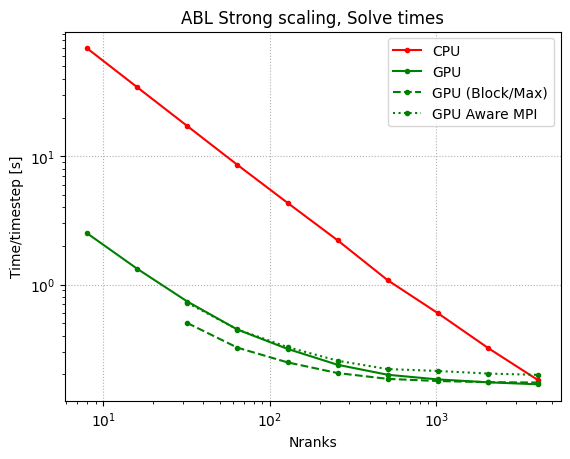

In [9]:
CPUranks, CPUsolvetimes = getRanksTimes(CPUcaselist)
plt.loglog(np.array(CPUranks), CPUsolvetimes, '.-', color='r', label='CPU')

GPUranks, GPUsolvetimes = getRanksTimes(GPUcaselist)
plt.loglog(np.array(GPUranks), GPUsolvetimes, '.-', color='g', label='GPU')

BGPUranks, BGPUsolvetimes = getRanksTimes(BLCKMAXGRID_GPUcaselist)
plt.loglog(np.array(BGPUranks), BGPUsolvetimes, '.--', color='g', label='GPU (Block/Max)')

GAMPIranks, GAMPIsolvetimes = getRanksTimes(GAMPI_GPUcaselist)
plt.loglog(np.array(GAMPIranks), GAMPIsolvetimes, '.:', color='g', label='GPU Aware MPI')

#L01GPUranks, L01GPUsolvetimes = getRanksTimes(Level01_GPUcaselist)
#plt.loglog(np.array(L01GPUranks), L01GPUsolvetimes, '.-.', color='g', label='GPU (Level 0+1)')

plt.ylabel('Time/timestep [s]')
plt.xlabel('Nranks')
plt.title('ABL Strong scaling, Solve times')
plt.legend()
plt.grid(ls=':')

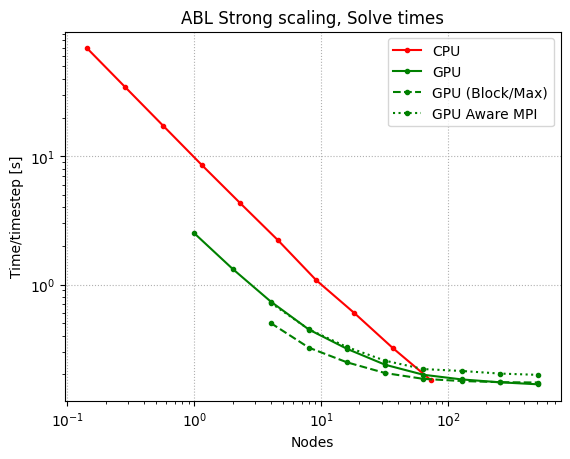

In [10]:
CPUranks, CPUsolvetimes = getRanksTimes(CPUcaselist)
plt.loglog(np.array(CPUranks)/56, CPUsolvetimes, '.-', color='r', label='CPU')

GPUranks, GPUsolvetimes = getRanksTimes(GPUcaselist)
plt.loglog(np.array(GPUranks)/8, GPUsolvetimes, '.-', color='g', label='GPU')

BGPUranks, BGPUsolvetimes = getRanksTimes(BLCKMAXGRID_GPUcaselist)
plt.loglog(np.array(BGPUranks)/8, BGPUsolvetimes, '.--', color='g', label='GPU (Block/Max)')

GAMPIranks, GAMPIsolvetimes = getRanksTimes(GAMPI_GPUcaselist)
plt.loglog(np.array(GAMPIranks)/8, GAMPIsolvetimes, '.:', color='g', label='GPU Aware MPI')

#L01GPUranks, L01GPUsolvetimes = getRanksTimes(Level01_GPUcaselist)
#plt.loglog(np.array(L01GPUranks)/8, L01GPUsolvetimes, '.-.', color='g', label='GPU (Level 0+1)')

plt.ylabel('Time/timestep [s]')
plt.xlabel('Nodes')
plt.title('ABL Strong scaling, Solve times')
plt.legend()
plt.grid(ls=':')

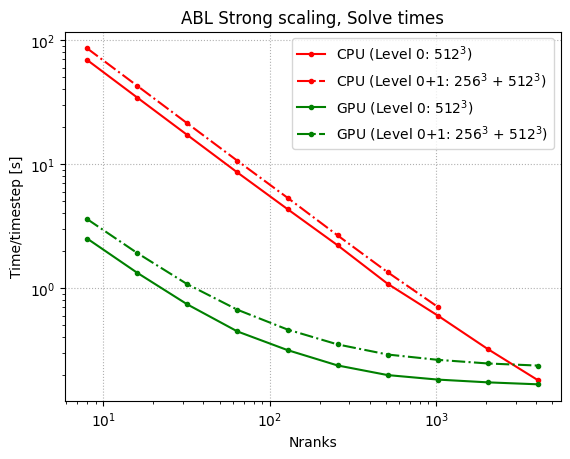

In [11]:
CPUranks, CPUsolvetimes = getRanksTimes(CPUcaselist)
plt.loglog(np.array(CPUranks), CPUsolvetimes, '.-', color='r', label='CPU (Level 0: $512^3$)')

L01CPUranks, L01CPUsolvetimes = getRanksTimes(Level01_CPUcaselist)
plt.loglog(np.array(L01CPUranks), L01CPUsolvetimes, '.-.', color='r', label='CPU (Level 0+1: $256^3$ + $512^3$)')

GPUranks, GPUsolvetimes = getRanksTimes(GPUcaselist)
plt.loglog(np.array(GPUranks), GPUsolvetimes, '.-', color='g', label='GPU (Level 0: $512^3$)')

#BGPUranks, BGPUsolvetimes = getRanksTimes(BLCKMAXGRID_GPUcaselist)
#plt.loglog(np.array(BGPUranks), BGPUsolvetimes, '.--', color='g', label='GPU (Block/Max)')

#GAMPIranks, GAMPIsolvetimes = getRanksTimes(GAMPI_GPUcaselist)
#plt.loglog(np.array(GAMPIranks), GAMPIsolvetimes, '.:', color='g', label='GPU Aware MPI')

L01GPUranks, L01GPUsolvetimes = getRanksTimes(Level01_GPUcaselist)
plt.loglog(np.array(L01GPUranks), L01GPUsolvetimes, '.-.', color='g', label='GPU (Level 0+1: $256^3$ + $512^3$)')

plt.ylabel('Time/timestep [s]')
plt.xlabel('Nranks')
#plt.xlim([16, 5000])
plt.title('ABL Strong scaling, Solve times')
plt.legend()
plt.grid(ls=':')